# *Merged Jupyter Notebook*

<hr><font color="green"><h1>from file: PredictiveMaintenanceMainNotebook1</h1></font>

# Predicitive maintanance model

Made by: Joey Einerhand, CÃ©dric Cortenraede, Lennox Narinx, Giuseppe Collura

## Get file
All files from the data directory will be loaded, _*this can take some time_\
based on the loaded data a dataframe will be created


In [1]:
import pandas as pd
import os

# Update "data_dir" location if necessary
data_dir = "data"
files = os.listdir(data_dir)
files = [file for file in files if file != "documentation.txt" and file != 'description.txt' and file != 'profile.txt']

In [2]:
df = pd.DataFrame()

# Load the sensor data
# Takes the mean of each row to illuminate different frequencies
for i in range(len(files)):
    df[files[i].strip(".txt")] = pd.read_csv(os.path.join(data_dir, files[i]), sep="\t", header=None, names=[files[i]]).mean(axis=1).to_numpy()

# Load the profiles
profiles = ["Cooler condition", "Valve condition", "Internal pump leakage", "Hydraulic accumulator", "Stable flag"]
for i in range(len(profiles)):
    df[profiles[i]] = pd.read_csv(os.path.join(data_dir,'profile.txt'), sep="\t", header=None)[i].to_numpy()

df

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,...,TS1,TS2,TS3,TS4,VS1,Cooler condition,Valve condition,Internal pump leakage,Hydraulic accumulator,Stable flag
0,28.866,1.383,2409.6,8.036,10.373,151.19,125.10,2.211,0.000,9.722,...,36.152,41.250,38.594,33.555,0.543,3,100,0,130,1
1,23.588,1.164,2397.8,7.890,10.391,150.86,125.04,2.219,0.000,9.623,...,37.477,42.105,39.250,35.121,0.534,3,100,0,130,1
2,21.519,1.103,2383.8,7.952,10.356,150.62,124.88,2.266,0.000,9.521,...,38.621,43.035,40.043,36.121,0.534,3,100,0,130,1
3,20.403,1.091,2372.0,7.773,10.261,150.28,124.59,2.273,0.000,9.420,...,39.461,43.988,40.922,36.988,0.542,3,100,0,130,1
4,20.016,1.106,2369.6,7.825,10.216,150.19,124.51,2.297,0.000,9.333,...,40.391,44.871,41.758,37.754,0.537,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,46.382,2.142,2415.6,7.874,10.171,151.86,125.73,2.273,10.207,9.979,...,35.414,40.922,38.187,30.379,0.527,100,100,0,90,0
2201,46.729,2.134,2413.6,7.787,10.174,151.78,125.44,2.406,10.193,9.953,...,35.398,40.891,38.195,30.375,0.544,100,100,0,90,0
2202,46.502,2.144,2413.6,7.685,10.171,151.83,125.94,2.250,10.246,9.998,...,35.437,40.898,38.160,30.379,0.517,100,100,0,90,0
2203,46.570,2.148,2415.6,7.793,10.189,151.78,125.91,2.281,10.189,9.953,...,35.441,40.898,38.176,30.375,0.528,100,100,0,90,0


## Analyse data
- The analysis looks at the correlation of the different columns in comparison to each other\
- This gives a filter to use later\
- The filter will be used to determine the columns impacting for the result

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
import math

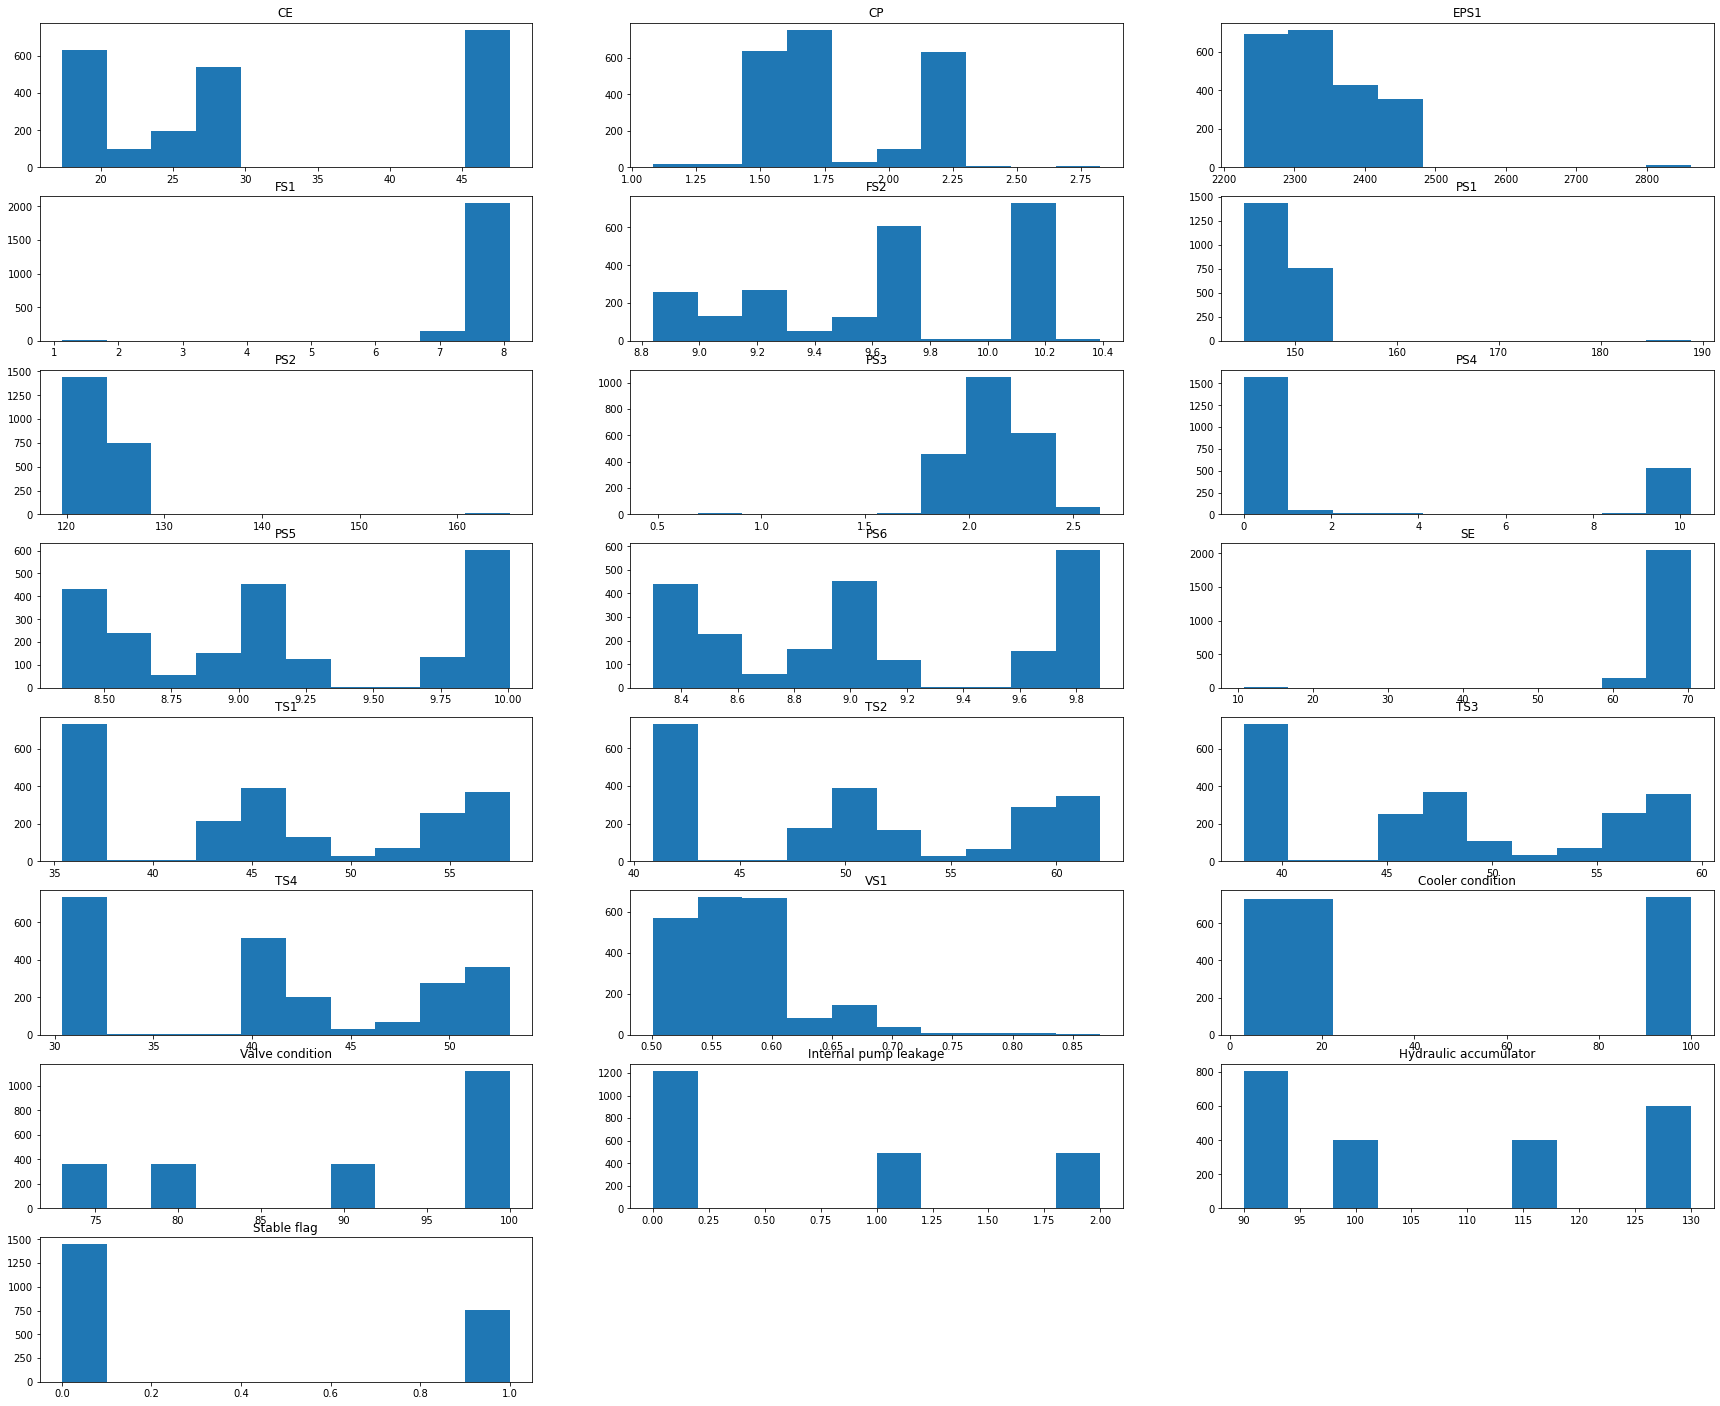

In [4]:
plt.figure(figsize=(30, 25))

i = 1
for column in df:
    data = df[column]
    plt.subplot(math.ceil(len(df.columns) / 3), 3, i)
    
    plt.title(column)
    plt.hist(data)
    
    i += 1

plt.show()

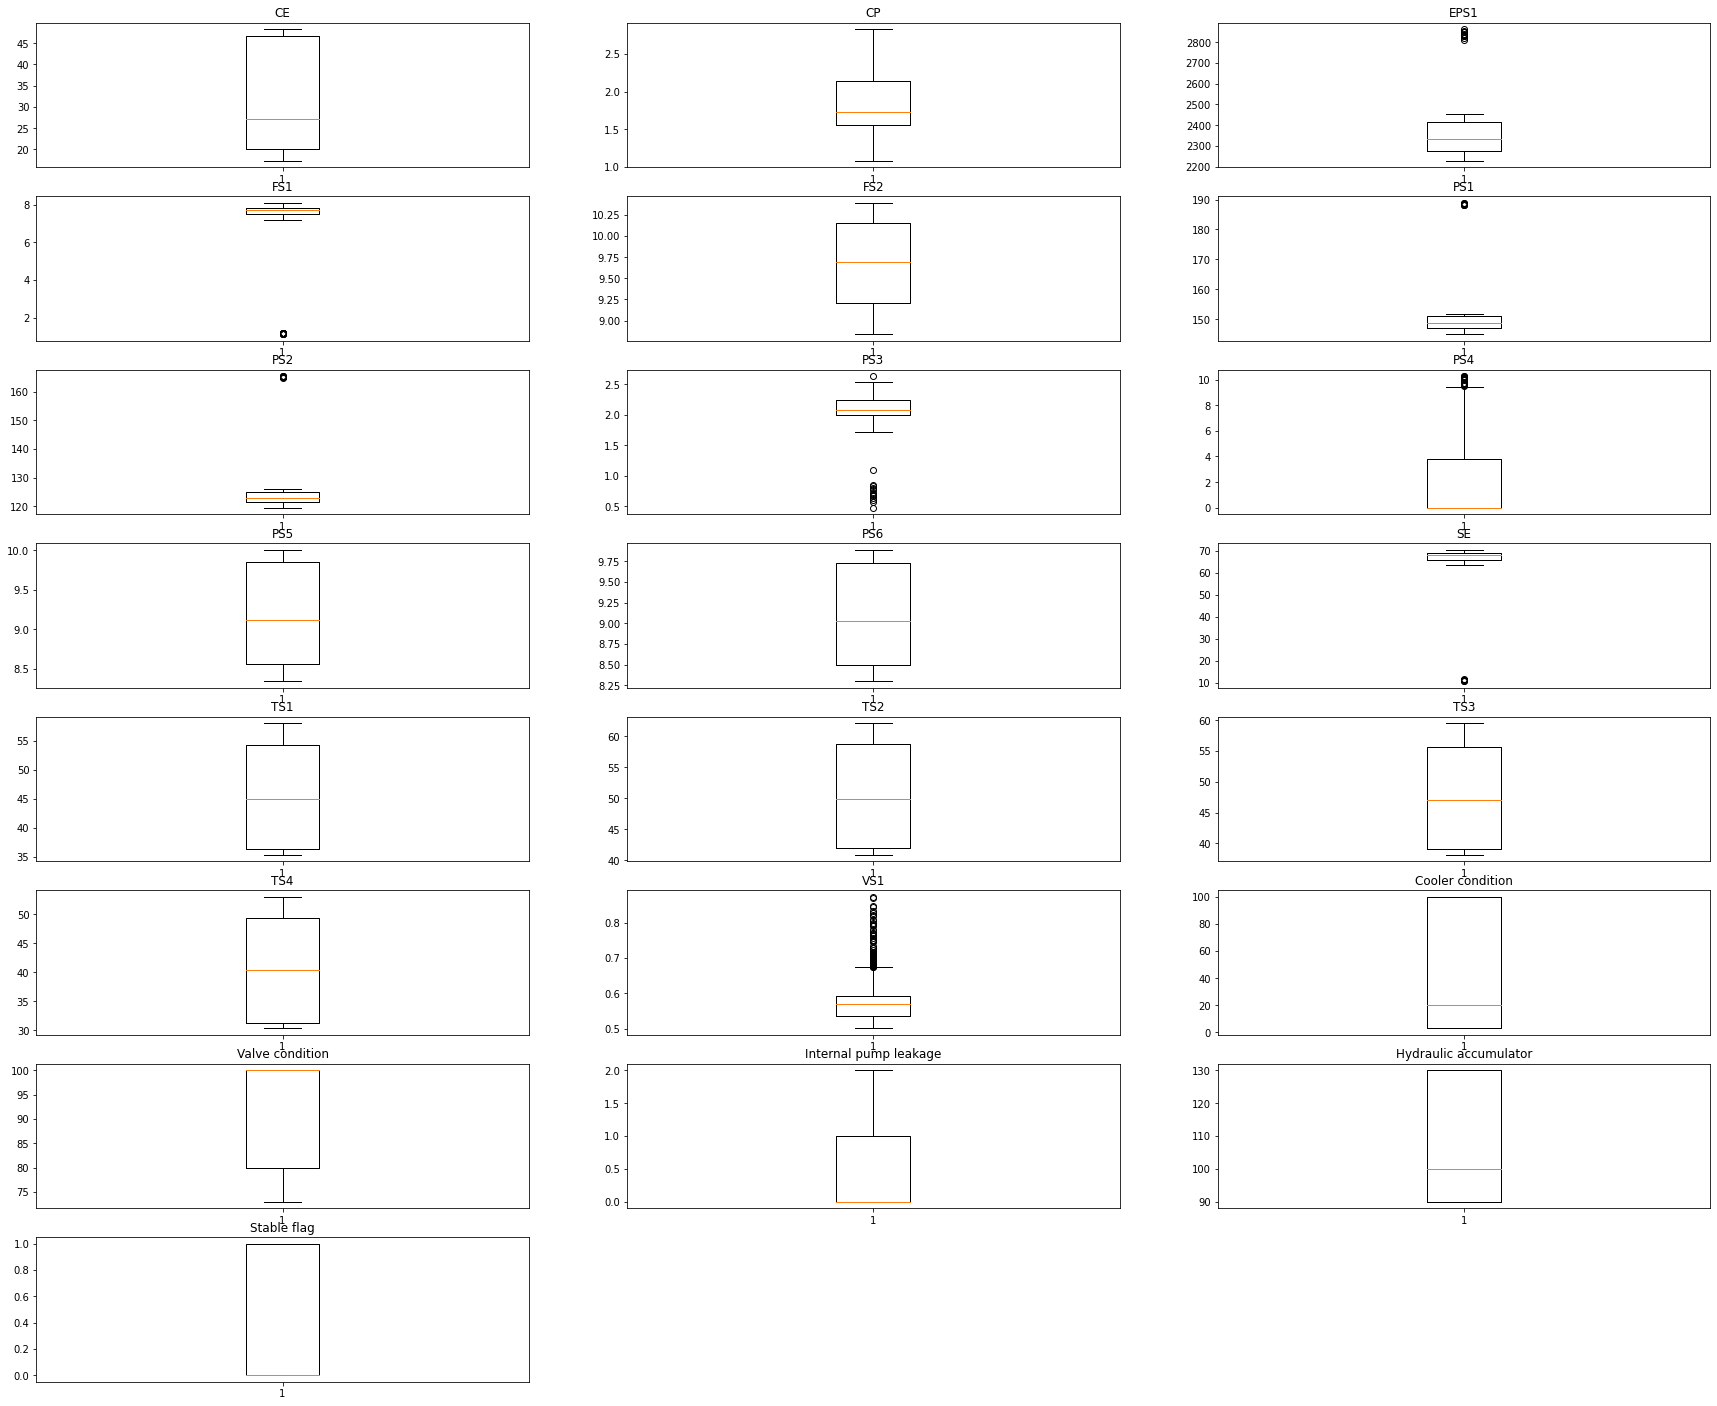

In [5]:
plt.figure(figsize=(30, 25))

i = 1
for column in df:
    data = df[column]
    plt.subplot(math.ceil(len(df.columns) / 3), 3, i)
    
    plt.title(column)
    plt.boxplot(data)
    
    i += 1

plt.show()

<AxesSubplot:>

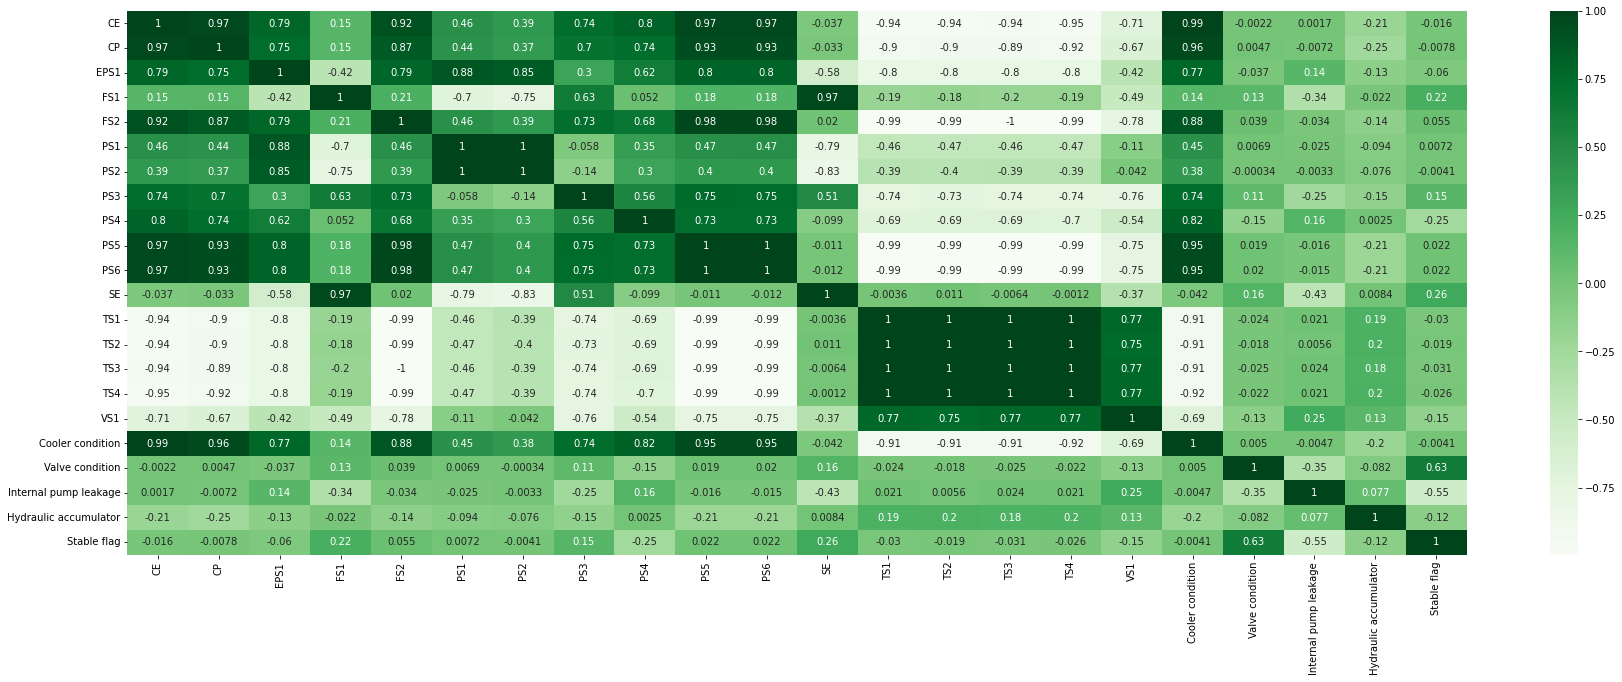

In [6]:
corr = df.corr()
plt.figure(figsize=(30, 10))
sb.heatmap(corr, cmap="Greens", annot=True)

## Making model

## Predicting LSTM
_Long Short Term Memory_

,Cooler condition,TS1,TS2,TS3,TS4
0,3,36.152,41.250,38.594,33.555
1,3,37.477,42.105,39.250,35.121
2,3,38.621,43.035,40.043,36.121
3,3,39.461,43.988,40.922,36.988
4,3,40.391,44.871,41.758,37.754


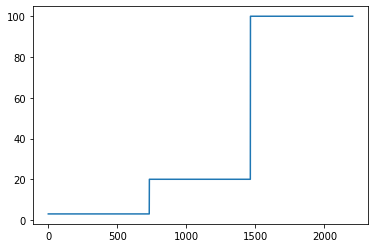

In [7]:
import matplotlib.pyplot as plt
import datetime
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import metrics

plt.plot(df["Cooler condition"], label="Cooler condition plot")

data = pd.DataFrame(index=range(0, len(df["Cooler condition"])), columns=["Cooler condition","TS1", "TS2", "TS3", "TS4"])
for i in range(0, len(data)):
    data["Cooler condition"][i] = df["Cooler condition"][i]
    data["TS1"][i] = df["TS1"][i]
    data["TS2"][i] = df["TS2"][i]
    data["TS3"][i] = df["TS3"][i]
    data["TS4"][i] = df["TS4"][i]

#data["Time"] = data["Time"].astype(int)
data["Cooler condition"] = data["Cooler condition"].astype(int)
data["TS1"] = data["TS1"].astype(float)
data["TS2"] = data["TS2"].astype(float)
data["TS3"] = data["TS3"].astype(float)
data["TS4"] = data["TS4"].astype(float)

data.head()

In [8]:
X_scaler=MinMaxScaler(feature_range=(0,1))
Y_scaler=MinMaxScaler(feature_range=(0,1))

X_data = X_scaler.fit_transform(data[["TS1", "TS2", "TS3", "TS4"]])
Y_data = Y_scaler.fit_transform(data[["Cooler condition"]])

# split into train and test sets
# Train is the dataset which the model is trained on
# Test is the dataset which the model is verified with
train_size = int(len(X_data) * 0.9)
test_size = len(X_data) - train_size
trainX, testX = X_data[0:train_size,:], X_data[train_size:len(X_data),:]
trainY, testY = Y_data[0:train_size,:], Y_data[train_size:len(X_data),:]

print(len(trainX), len(testX))

1984 221


In [9]:
# # convert an array of values into a dataset matrix
# def create_dataset(dataset, look_back=1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-look_back-1):
# 		a = dataset[i:(i+look_back), 0]
# 		dataX.append(a)
# 		dataY.append(dataset[i + look_back, 0])
# 	return np.array(dataX), np.array(dataY)

# # reshape into X=t and Y=t+1
# look_back = 1
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 4)))
#model.add(LSTM(4, return_sequences=True,stateful=True, batch_input_shape=(1, None,  look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, verbose=1)

Epoch 1/100
62/62 [==============================] - 1s 803us/step - loss: 0.2467
Epoch 2/100
62/62 [==============================] - 0s 803us/step - loss: 0.2071
Epoch 3/100
62/62 [==============================] - 0s 803us/step - loss: 0.1635
Epoch 4/100
62/62 [==============================] - 0s 771us/step - loss: 0.1211
Epoch 5/100
62/62 [==============================] - 0s 770us/step - loss: 0.0873
Epoch 6/100
62/62 [==============================] - 0s 803us/step - loss: 0.0613
Epoch 7/100
62/62 [==============================] - 0s 836us/step - loss: 0.0415
Epoch 8/100
62/62 [==============================] - 0s 771us/step - loss: 0.0262
Epoch 9/100
62/62 [==============================] - 0s 754us/step - loss: 0.0157
Epoch 10/100
62/62 [==============================] - 0s 770us/step - loss: 0.0094
Epoch 11/100
62/62 [==============================] - 0s 770us/step - loss: 0.0063
Epoch 12/100
62/62 [==============================] - 0s 787us/step - loss: 0.0050
Epoch 13/100


62/62 [==============================] - 0s 918us/step - loss: 0.0018
Epoch 100/100
62/62 [==============================] - 0s 748us/step - loss: 0.0018


In [12]:
# # make predictions
# import math
# from sklearn.metrics import mean_squared_error 

# trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)
# # invert predictions
# trainPredict = X_scaler.inverse_transform(trainPredict)

# #reshape
# trainY.reshape((len(trainY), 1))


# trainY = scaler.inverse_transform(trainY)
# testPredict = scaler.inverse_transform(testPredict)


# testY = scaler.inverse_transform(testY)
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

In [13]:
#Try to predict a portion of the dataset with the trained model
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(X_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(X_data)
testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
testPredictPlot[len(trainPredict):len(X_data), :] = testPredict



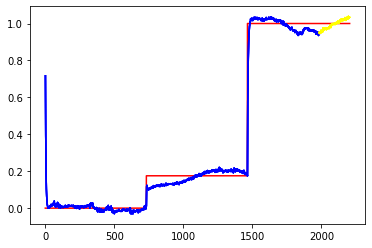

In [14]:
# ---------------------------------------
#  Convert data to something we can plot
# ---------------------------------------


# plot baseline and predictions
# plt.plot(X_data, color="red")
# plt.plot(newTrainPredictPlot, color="blue")
# plt.plot(newTestPredictPlot, color="yellow")
plt.plot(Y_data, color="red")
plt.plot(trainPredictPlot, color="blue")
plt.plot(testPredictPlot, color="yellow")
plt.show()

In [15]:
## ----------------------------
## METRICS
## ----------------------------
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') 
    
print("Training metrics")
timeseries_evaluation_metrics_func(trainY, trainPredict)
print("Testing metrics")
timeseries_evaluation_metrics_func(testY, testPredict)

# trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

Training metrics
Evaluation metric results:-
MSE is : 0.0017964881195218958
MAE is : 0.025959975010968465
RMSE is : 0.04238499875571422
MAPE is : inf
R2 is : 0.9892205219718502

Testing metrics
Evaluation metric results:-
MSE is : 0.0006345036401852442
MAE is : 0.021355490069583517
RMSE is : 0.025189355692141955
MAPE is : 2.1355490069583527
R2 is : 0.0



C:\Users\JEAN-P~1\AppData\Local\Temp/ipykernel_173244/1746995336.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
